In [1]:
import pandas as pd

In [15]:
# Chargement des données
df = pd.read_csv('C:/Users/User/Desktop/DU DATA ANALYTICS/Cours Mlops/projet Mlops/Loan_Data.csv')

In [17]:
# Afficher les cinq premiers lignes
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [21]:
# Vérifier le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64


In [23]:
# La statistique descriptive
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


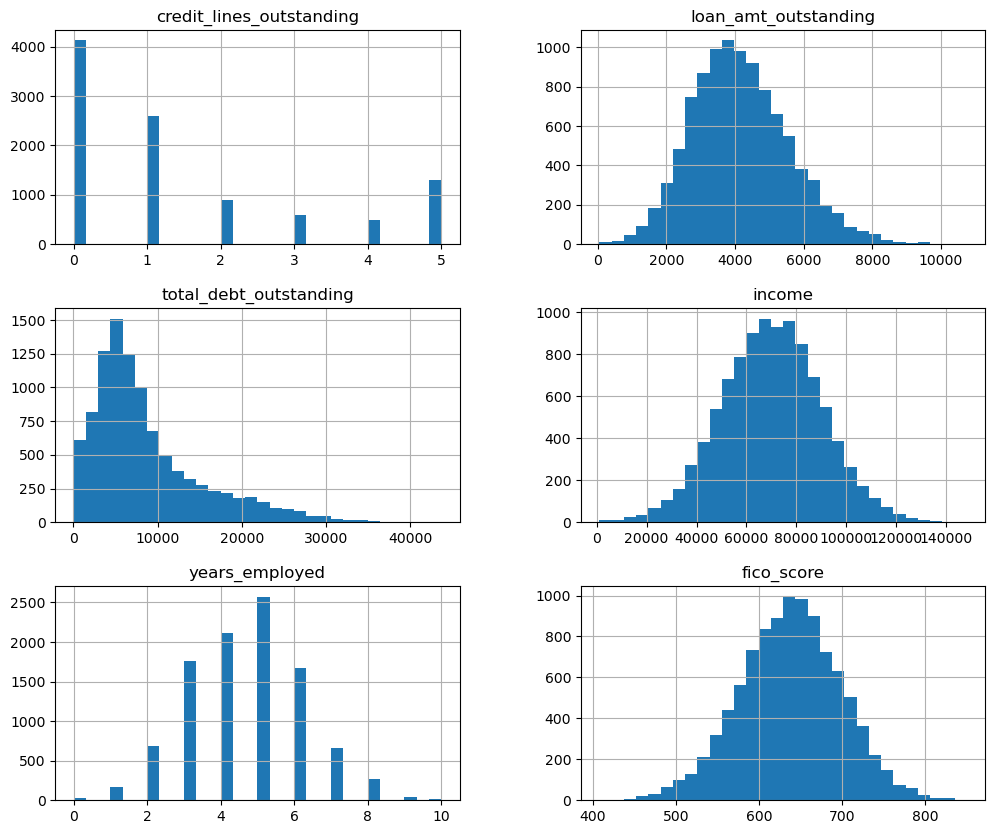

In [27]:
import matplotlib.pyplot as plt

# Distribution des variables numériques
numeric_cols = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.show()

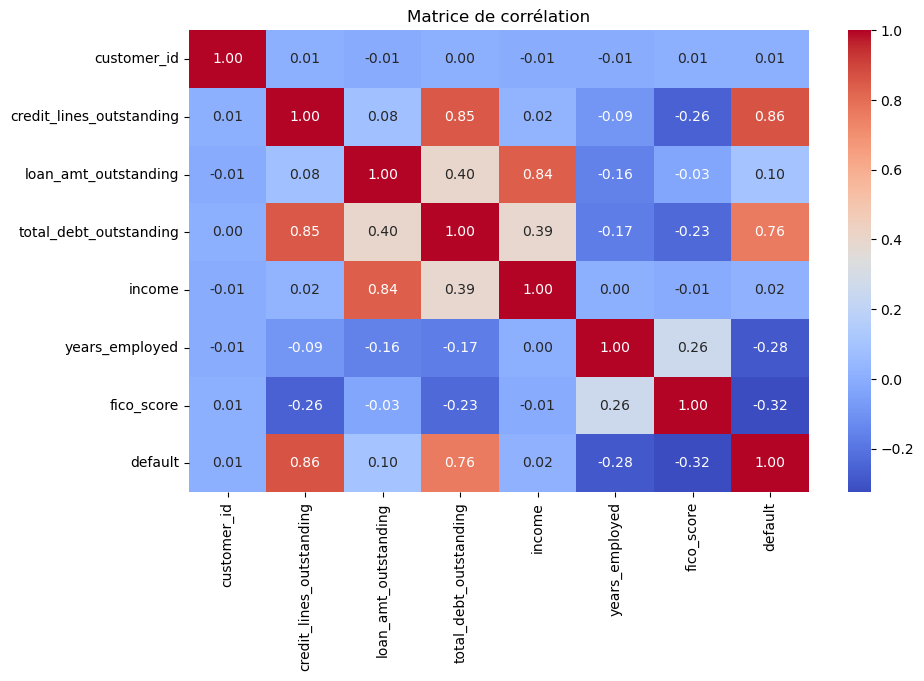

In [31]:
import seaborn as sns

# Visualisation de la corrélation entre les variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

In [39]:
# Suppression de la colonne customer_id
df.drop(columns=['customer_id'], inplace=True)

# Transformation de la colonne default en booléen
df['default'] = df['default'].astype(bool)

In [55]:
# Prétraitement : Normalisation des variables numériques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\ndf normalisées :")
df.head()


df normalisées :


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,-0.837960,0.747096,-0.724848,0.398555,0.285425,-0.536770,False
1,2.029409,-1.548375,-0.073967,-2.161876,-1.629325,-1.080832,True
2,-0.837960,-0.560509,-1.009696,-0.207919,-0.352825,-0.586230,False
3,-0.837960,0.427045,-0.938184,0.215083,0.285425,-0.421363,False
4,-0.264486,-1.979733,-1.048780,-2.321314,0.923675,-0.108115,False


In [59]:
df.to_csv('C:/Users/User/Desktop/DU DATA ANALYTICS/Cours Mlops/projet Mlops/df.csv', index=False)